[[[36 36 36]
  [37 37 37]
  [38 38 38]
  ...
  [ 9  9  9]
  [ 7  7  7]
  [ 6  6  6]]

 [[36 36 36]
  [37 37 37]
  [38 38 38]
  ...
  [ 7  7  7]
  [ 8  8  8]
  [ 4  4  4]]

 [[36 36 36]
  [37 37 37]
  [39 39 39]
  ...
  [ 3  3  3]
  [ 9  9  9]
  [ 4  4  4]]

 ...

 [[ 6  6  6]
  [ 5  5  5]
  [ 7  7  7]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 3  3  3]
  [ 6  6  6]
  [ 6  6  6]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 2  2  2]
  [ 7  7  7]
  [ 3  3  3]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]


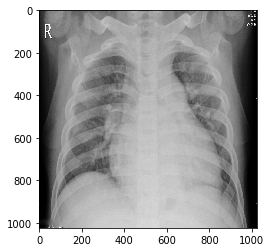

In [48]:
!pip install inline

import inline
import matplotlib
# %matplotlib inline
import numpy as np
import cv2
# import os
# import globS
#import pydicom as dicom
from matplotlib import pyplot as plt
from skimage.morphology import extrema
from skimage.morphology import watershed as skwater


def grayscale_convert(image):
    # grab the image dimensions
    h = image.shape[0]
    w = image.shape[1]

    # loop over the image, pixel by pixel
    for y in range(0, h):
        for x in range(0, w):
            # threshold the pixel
            image[y, x] = 255 if image[y, x] == 1 else 0

    # return the grayscale image
    return image


def ShowImage(title, img, ctype):
    plt.figure(figsize=(10, 10))
    if ctype == 'bgr':
        b, g, r = cv2.split(img)  # get b,g,r
        rgb_img = cv2.merge([r, g, b])  # switch it to rgb
        plt.imshow(rgb_img)
    elif ctype == 'hsv':
        rgb = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
        plt.imshow(rgb)
    elif ctype == 'gray':
        plt.imshow(img, cmap='gray')
    elif ctype == 'rgb':
        plt.imshow(img)
    else:
        raise Exception("Unknown colour type")
    plt.axis('off')
    plt.title(title)
    plt.show()


# Read in image

img = cv2.imread('test/testpng.png')
plt.imshow( initial)
print(initial)

dim = (1024, 1024)
# resize image
initial = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 










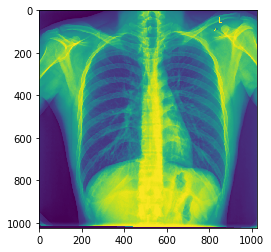

In [49]:
gray1 = cv2.cvtColor(initial, cv2.COLOR_BGR2GRAY)
gray1 = cv2.equalizeHist(gray1)
# median filter
gray1 = cv2.medianBlur(gray1, 5)
plt.imshow( gray1)


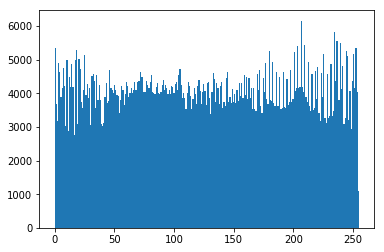

In [50]:
# noise removal
gray1 = cv2.GaussianBlur(gray1, (5, 5), 0)
plt.hist(gray1.ravel(), 256)
plt.show()

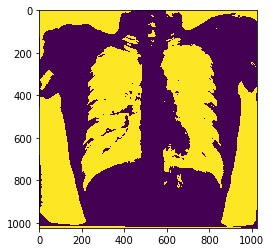

In [51]:


# Threshold the image to binary using local method
thresh1 = cv2.adaptiveThreshold(gray1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 699, 6)

plt.imshow( thresh1)

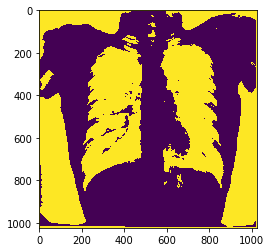

In [52]:
constant = cv2.rectangle(thresh1, (0, 0), (1024, 1024), (255, 255, 255), 5)
plt.imshow(constant)

[array([[[   0,    0]],

       [[   0, 1023]],

       [[1023, 1023]],

       [[1023,    0]]], dtype=int32), array([[[  3, 709]],

       [[  4, 708]],

       [[  6, 710]],

       [[  6, 711]],

       [[  7, 712]],

       [[  6, 713]],

       [[  6, 716]],

       [[  7, 717]],

       [[  7, 718]],

       [[  6, 719]],

       [[  6, 722]],

       [[  7, 723]],

       [[  7, 724]],

       [[  6, 725]],

       [[  7, 726]],

       [[  7, 727]],

       [[  9, 729]],

       [[  9, 730]],

       [[ 11, 732]],

       [[ 11, 735]],

       [[  8, 738]],

       [[  8, 741]],

       [[  9, 742]],

       [[  9, 743]],

       [[ 10, 744]],

       [[ 10, 748]],

       [[ 11, 749]],

       [[ 11, 750]],

       [[  8, 753]],

       [[  8, 755]],

       [[  9, 756]],

       [[  9, 757]],

       [[  8, 758]],

       [[  8, 764]],

       [[ 10, 766]],

       [[ 10, 767]],

       [[ 11, 768]],

       [[ 11, 769]],

       [[ 12, 770]],

       [[ 12, 771]],

       [[

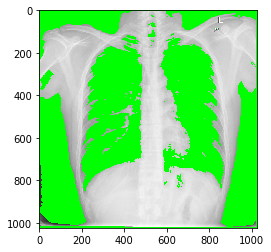

In [53]:

# finding cotours
cnts, hierachy = cv2.findContours(constant, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(cnts)
print(constant.shape)
draw_counters = initial.copy()

cv2.drawContours(draw_counters, cnts, -1, (0, 255, 0), -1)
plt.imshow(draw_counters)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


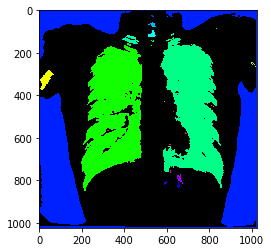

In [54]:

# calculate number of pixel clusters
ret, markers = cv2.connectedComponents(constant)
print(markers)

label_hue = np.uint8(179 * markers / np.max(markers))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# cvt to BGR for display
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue == 0] = 0
plt.imshow(labeled_img)

[221646, 88, 17, 1, 380, 27, 717, 107, 1652, 116949, 19, 53, 183, 127881, 25, 16, 138, 1, 31, 2812, 19, 2, 34, 57, 9, 23, 4, 10, 57, 61, 38, 2, 7, 3, 60, 652, 20, 22, 137]
[221646, 88, 17, 1, 380, 27, 717, 107, 1652, 116949, 19, 53, 183, 127881, 25, 16, 138, 1, 31, 2812, 19, 2, 34, 57, 9, 23, 4, 10, 57, 61, 38, 2, 7, 3, 60, 652, 20, 22, 137]
13
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
(1024, 1024)


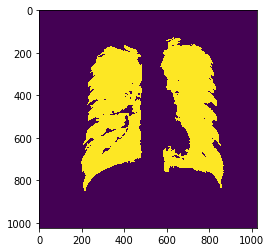

In [55]:
# Get the area taken by each component. Ignore label 0 since this is the background.
marker_area = [np.sum(markers == m) for m in range(np.max(markers)) if m != 0]
print(marker_area)

# Get label of largest component by area
sorted_marker_area = sorted(marker_area, reverse=True)
print(marker_area)
largest_component_1 = marker_area.index(sorted_marker_area[1])
largest_component_2 = marker_area.index(sorted_marker_area[2])

print(largest_component_1)
# Get pixels which correspond to the lung
lung_mask = markers == largest_component_1 + 1
lung_mask = lung_mask + (markers == largest_component_2 + 1)
print(lung_mask)

# lung_mask.astype(np.uint8)
lung_mask = grayscale_convert(np.uint8(lung_mask))
print(lung_mask.shape)
plt.imshow(lung_mask)

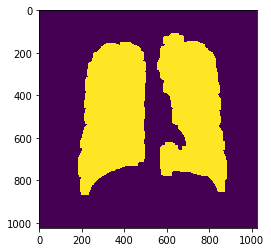

In [56]:

kernel = np.ones((32, 32), np.uint8)
closing = cv2.morphologyEx(lung_mask, cv2.MORPH_DILATE, kernel)
# ShowImage('Closing', closing, 'gray')
plt.imshow( closing)



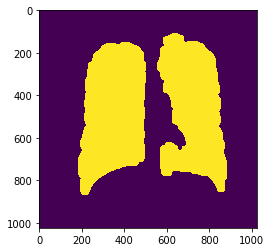

In [57]:
# median filter
median = cv2.medianBlur(closing, 11)
plt.imshow(median)



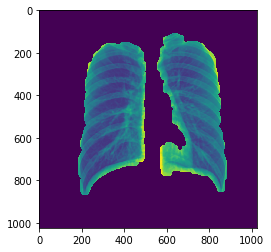

In [58]:
# converting back to binary
ret, thresh1 = cv2.threshold(median, 127, 255, cv2.THRESH_BINARY)

lung_out = gray1.copy()
# In a copy of the original image, clear those pixels that don't correspond to the lungs
lung_out[thresh1 == False] = (0)
# ShowImage('Connected Components',lung_out,'rgb')

plt.imshow(lung_out)



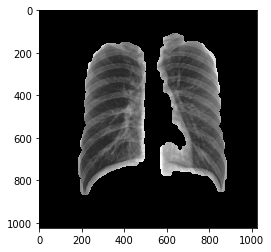

In [59]:

outAsFloat = cv2.cvtColor(lung_out, cv2.CV_32F)
Gabor = outAsFloat.copy()
kernal = cv2.getGaborKernel((30, 30), 2, 10, 2, 2)
plt.imshow(Gabor)


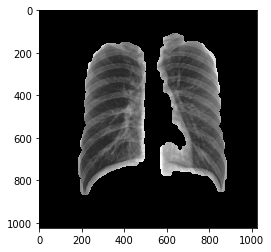

In [60]:
cv2.filter2D(outAsFloat, cv2.CV_32F, kernal, Gabor)
plt.imshow(Gabor)

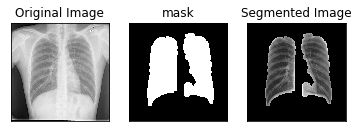

In [67]:
titles = ['Original Image', 'mask',
            'Segmented Image']
images = [initial, median, Gabor]

for i in range(3):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()